In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [57]:
data = pd.read_csv("C:/Users/Pratham Patil/Analysis data.csv")

In [58]:
Data = data[['title','industry/department','company','skills','responsibility']]

In [59]:
Data.head()

,title,industry/department,company,skills,responsibility
0,Finance Analyst,Various/Finance,oliver plus,1. Finance experience\n2. Advanced Excel\n3. P...,1. Track labor costs\n2. Analyze timesheets\n3...
1,Senior Business Financial Analyst,Finance,LRQA Group,1.Power BI\n2.SAP\n3.Microsoft Office\n4.Finan...,1. Improve reporting\n2. Create reports\n3. Bu...
2,Finance Analyst,Financial Technology and Retail Technology,NCR Atleos,1. Financial Analysis\n2. Pricing\n3. Risk Ass...,1. Bid Profiling\n2. Pricing Guidance\n3. Marg...
3,Business Finance Analyst,Data Analytics and Experience Design,Techmatters Technologies,1.Tableau/Power BI\n2. Advanced MS Excel\n3. S...,1. Revenue MIS/Dashboard\n2. Data Liaison\n3. ...
4,Senior Finance Analyst-Reporting and Analysis,Professional Services,Ernst & Young,1. Data Analysis\n2. Problem Solving\n3. Accou...,1. Standard Reporting\n2. Issue Resolution\n3....


In [60]:
Data = {
        "title":[
    "Finance Analyst", "Senior Business Financial Analyst", "Finance Analyst", "Business Finance Analyst",
    "Senior Finance Analyst-Reporting and Analysis", "Associate Finance Analyst", "Financial Analyst",
    "Financial Analyst", "Financial Analyst", "Analyst, Commercial Operations", "Financial Analyst",
    "Financial Analyst - Investment Banking", "Junior Finance Analyst", "Coverage Finance Analyst",
    "Financial Planning and Analysis Manager", "Sr. Associate - Financial Analyst", "Financial Analyst",
    "Financial Analyst", "Financial Analyst", "Financial Analyst", "Analyst Responsible Investments",
    "Sales and Commercial Finance Analyst", "Financial Reporting Analyst", "Analyst, Investment Operations",
    "Financial Analyst", "Analyst - Financial Operations", "IR and Financial Analyst", "Finance Analyst",
    "Analyst, Financial Planning & Analysis", "Finance Rptg Analyst", "Financial Analyst",
    "Financial Plan & Analysis Analyst-Record To Report", "Analyst", "Financial Operations Analyst",
    "Accounts Executive", "Credit Analyst", "Investment Banking Junior Analyst", "Digital Finance Analyst MDS",
    "Investment Risk Analyst", "Financial Planning Analyst", "Credit Analyst", "Analyst, Cash and Asset Reconciliation",
    "Financial Planning Analyst", "Financial Analyst", "Analyst-Trade Finance Operations", "FP&A Analyst",
    "Financial Analyst Senior", "BPA Analyst", "Senior Analyst-FIU"],
        "skills":[["Excel", "Financial Modeling"], ["Excel", "Financial Modeling", "Analysis"], ["Excel", "Reporting"],
        ["Excel", "Analysis"], ["Excel", "Reporting", "Analysis"], ["Excel"], ["Excel", "Reporting"], ["Excel", "Analysis"],
        ["Excel", "Financial Modeling"], ["Operations Management"], ["Excel"], ["Investment Banking", "Excel"],
        ["Excel", "Reporting"], ["Excel", "Financial Modeling"], ["Financial Planning", "Excel"], ["Excel"],
        ["Excel", "Reporting"], ["Excel", "Financial Modeling"], ["Excel", "Reporting"], ["Excel", "Analysis"],
        ["Investments"], ["Excel", "Sales"], ["Financial Reporting", "Excel"], ["Investment Operations", "Excel"],
        ["Excel", "Financial Modeling"], ["Excel"], ["Excel", "IR"], ["Excel", "Financial Modeling"], ["Financial Planning", "Excel"],
        ["Excel"], ["Financial Planning", "Excel"], ["Excel", "Financial Modeling"], ["Excel", "Financial Operations"],
        ["Accounting"], ["Credit Analysis"], ["Investment Banking", "Excel"], ["Digital Finance", "Excel"],
        ["Risk Analysis", "Excel"], ["Financial Planning", "Excel"], ["Credit Analysis", "Excel"],
        ["Cash Reconciliation", "Excel"], ["Financial Planning", "Excel"], ["Excel", "Financial Modeling"],
        ["Trade Finance", "Excel"], ["Financial Planning", "Excel"], ["Excel", "Financial Modeling"], ["Business Planning", "Excel"],
        ["Financial Analysis"], ["Analysis"]
                 ]}

In [61]:
title_groups = {"Financial Analyst / Finance Analyst":["Finance Analyst", "Senior Business Financial Analyst", "Senior Finance Analyst-Reporting and Analysis",
        "Associate Finance Analyst", "Financial Analyst", "Financial Analyst - Investment Banking",
        "Junior Finance Analyst", "Coverage Finance Analyst", "Sr. Associate - Financial Analyst",
        "Financial Reporting Analyst", "IR and Financial Analyst", "Finance Rptg Analyst",
        "Financial Plan & Analysis Analyst-Record To Report", "Financial Operations Analyst",
        "Digital Finance Analyst MDS", "Financial Planning Analyst", "Analyst-Trade Finance Operations",
        "FP&A Analyst", "Financial Analyst Senior", "BPA Analyst", "Senior Analyst-FIU"],
                "Business Analyst/commercial Analyst":["Business Finance Analyst", "Analyst, Commercial Operations", "Analyst Responsible Investments",
        "Sales and Commercial Finance Analyst", "Analyst, Investment Operations", "Analyst - Financial Operations",
        "Analyst, Financial Planning & Analysis", "Investment Risk Analyst", "Analyst, Cash and Asset Reconciliation",
        "Financial Planning Analyst"],
                "Credit Analyst":["Credit Analyst", "Investment Banking Junior Analyst"],
                "General Analyst":["Analyst", "Coverage Finance Analyst"],
                "Accounts Executive":["Accounts Executive"]}

In [62]:
def assign_group(title):
    for group, titles in title_groups.items():
        if title in titles:
            return group
    return "Other"

In [63]:
group_skills = {}
for group, titles in title_groups.items():
    group_skills[group] = set()
    for title in titles:
        skills = data_df[data_df['title'] == title]['skills'].values[0]
        group_skills[group].update(skills)

In [65]:
data_df = pd.DataFrame(data)
data_df['group'] = data_df['title'].apply(assign_group)


In [66]:
job_skills = {
    "Financial Analyst": ["Technical Skills", "Data Visualization", "Finance Skills", "Operations Skills", "Business Skills", "Certifications"],
    "Business Analyst / Commercial Analyst": ["Programming", "Data Visualization", "Data Analysis", "Business Skills", "Operations Skills"],
    "Credit Analyst": ["Credit Appraisal", "Processing", "Operations", "Financial Institutions", "Financial Tools"],
    "General Analyst": ["Accounting", "Microsoft Skills", "Financial Planning", "Expense Management", "Audit", "Analytical Tools"],
    "Accounts Executive": ["Financial Planning", "Financial Services", "Reporting", "Accounting", "Forecasting", "Cost Control"]
}

In [67]:
G = nx.Graph()

In [72]:
for job_title, skills in job_skills.items():
    G.add_node(job_title, type='job_title')
    for skill in skills:
         if skill not in G:
            G.add_node(skill, type='skill')
            G.add_edge(job_title, skill)

In [73]:
node_colors = []
for node, data in G.nodes(data=True):
    if data['type'] == 'job_title':
        node_colors.append('red')
    elif data['type'] == 'skill':
        node_colors.append('green')

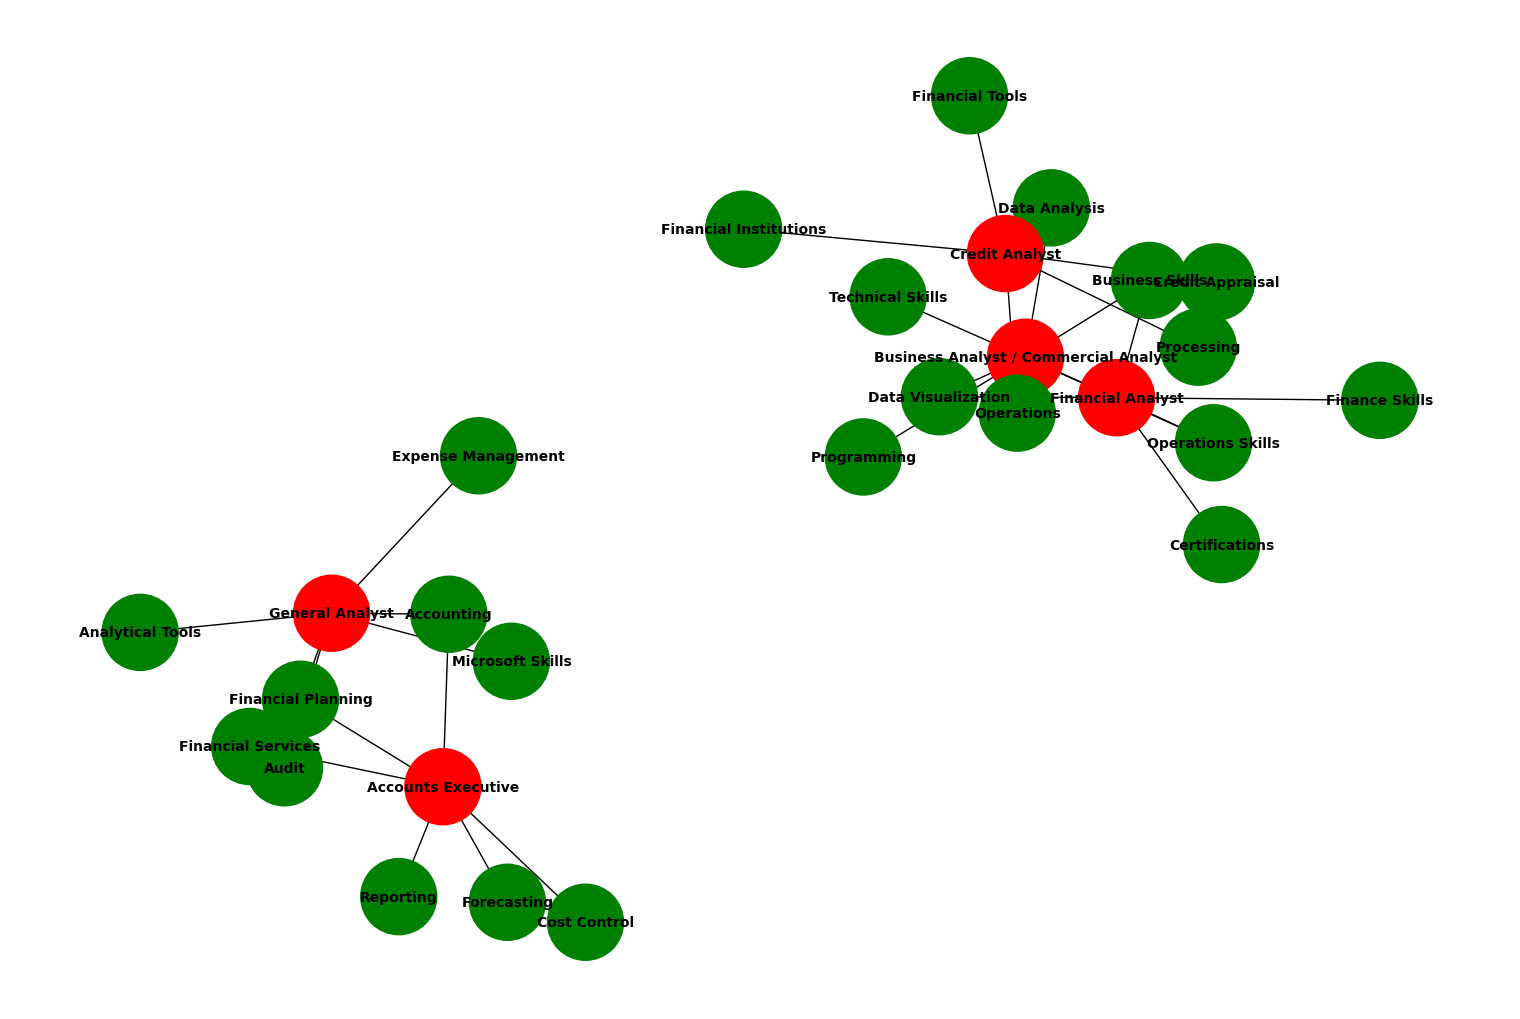

In [74]:
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_color='black', font_weight='bold')